In [1]:
## IMPORTS

import os
import sys
import re
import time
import math
from datetime import datetime
from io import StringIO


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from numpy.polynomial.polynomial import Polynomial
import scipy.integrate as integrate
import scipy.optimize as sco
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import openpyxl
import networkx as nx
import sklearn.metrics
from IPython.core.display import HTML
import plotly.io as pio
from openpyxl.utils.dataframe import dataframe_to_rows
import openpyxl as opxl
import matplotlib.ticker as mtick
from matplotlib.cm import get_cmap
import time


sys.path.append(r'D:\seagu_OneDrive\Documents\GitHub\parallel-flow-distribution-pressure-loss\ansys')
sys.path.append(r'D:\seagu_OneDrive\Documents\GitHub\PVT-thermal-performance-model')
import jou_gen as jg
import ansys_py_bridge as apb
import ansys.fluent.core as pyfluent
import plot_bridge as pb
import model as ty
import proc as pr
import plot_functions_here as pfun
import heat_transfer as bht
import fluids as fds
import ht
import general as gen
folder_path = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests'
hypotheses_path = folder_path + '\\' + 'Model_hypotheses.xlsx'
condi_path = folder_path + '\\' + 'test-Conditions-AR.xlsx'
geometry_path = folder_path + '\\' + 'Inputs_TEST_V4.5_GG.xlsx'
plot_path = folder_path + '\\' + 'Plot_hyp.xlsx'

hyp = pr.create_dict_from_excel(hypotheses_path,'Main')
steadyStateConditions_df = pd.read_excel(condi_path,header=2) ## Les deux première lignes ne sont pas à prendre
stepConditions = steadyStateConditions_df.to_dict(orient='records')
panelSpecs = pr.import_geometry(geometry_path)

plot_hyp = pr.create_dict_from_excel(plot_path,'Main')


In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
plot_hyp['nb_it']=7
plot_hyp

In [ ]:
# 'mesh' ou 'case'
ht_tot_mesh_case_list, ht_rad_mesh_case_list, ht_conv_mesh_case_list, CFD_mesh_case_list, df_one_mesh_case_list, slices_df_mesh_case_list, PyFluent_mesh_case_list = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
# Cas 'mesh' ou 'case'
Qdot_tube_fluid, Qdot_top, Qdot_top_rad, Qdot_tube_back, Qdot_PV_sky = pb.calculate_Qdot(plot_hyp, panelSpecs, hyp, stepConditions, mesh = 0, case = 0, iteration = 0)

In [ ]:
# Cas 'ref
plot_hyp['method'] = 'ref'
ht_tot_AR_list, ht_rad_AR_list, ht_conv_AR_list, CFD_AR_list, df_one_AR_list, slices_df_AR_list, PyFluent_AR_list, ht_tot_uniform, ht_rad_uniform, ht_conv_uniform, CFD_uniform, df_one_uniform, slices_df_uniform, df_PyFluent_uniform, df_one_1D, slices_df_1D, df_PyFluent_1D = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
Qdot = "Qdot_tube_fluid"
pb.plot_CFD_last_it(Qdot, plot_hyp, panelSpecs, hyp, stepConditions)
pb.plot_1D_last_it(Qdot, plot_hyp, panelSpecs, hyp, stepConditions)
pb.plot_big_it(Qdot, plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
pb.plot_big_it('Qdot_top_rad', plot_hyp, panelSpecs, hyp, stepConditions) 

In [ ]:
pb.plot_profile_temp(plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
plot_hyp['method'] = 'mesh'
plot_hyp['nb_cases'] = 5
plot_hyp['nb_mesh'] = 1
plot_hyp['nb_it'] = 1
plot_hyp['folder_mesh'] = 'Simu_1D_'
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
pb.plot_1D_DeltaT_tot('Qdot_tube_fluid', plot_hyp, panelSpecs, hyp, stepConditions)
# ht_tot_mesh_case_list, ht_rad_mesh_case_list, ht_conv_mesh_case_list, CFD_mesh_case_list, df_one_mesh_case_list, slices_df_mesh_case_list, PyFluent_mesh_case_list = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)
# df_one_mesh_case_list[0][0][0]

In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
plot_hyp['nb_it']=7
plot_hyp['folder_mesh'] = 'Simu_M'
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
pb.plot_CFD_last_it('Qdot_tube_fluid', plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
plot_hyp['method'] = 'mesh'
plot_hyp['nb_cases'] = 3
plot_hyp['nb_mesh'] = 4
plot_hyp['nb_it'] = 1
plot_hyp['folder_mesh'] = 'Simu_uniform'
plot_hyp['folder_name'] = 'cas_M'
plot_hyp['new_save'] = False
nb_mesh = plot_hyp['nb_mesh']
nb_cases = plot_hyp['nb_cases']

for mesh in range(nb_mesh):
    for case in range(nb_cases):
        ratio_rad, ratio_conv = pb.rad_conv_ratio(plot_hyp, panelSpecs, hyp, stepConditions, mesh, case, -1)
        print(f'ratio_rad = {ratio_rad}, ratio_conv = {ratio_conv}, Simu_uniform{mesh+1}, cas_M{case}')

In [ ]:
plot_hyp['method'] = 'mesh'
plot_hyp['nb_cases'] = 3
plot_hyp['nb_mesh'] = 5
plot_hyp['nb_it'] = 1
plot_hyp['folder_mesh'] = 'Simu_uniform'
plot_hyp['folder_name'] = 'cas_M'
plot_hyp['new_save'] = False
pb.plot_CFD_last_it('Qdot_top_conv', plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:

file_name = 'residuals_cas_ref_CFD_uniform.txt'
residual = 1
for j in range(3) :
    fig, ax = plt.subplots()
    file_path_base = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests' + '\\' + f'Simu_uniform2\cas_M{j}'
    file_path = os.path.join(file_path_base, file_name)
    residuals2 = pb.extract_residuals(file_path)
    file_path_base = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests' + '\\' + f'Simu_uniform3\cas_M{j}'
    file_path = os.path.join(file_path_base, file_name)
    residuals3 = pb.extract_residuals(file_path)
    file_path_base = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests' + '\\' + f'Simu_uniform4\cas_M{j}'
    file_path = os.path.join(file_path_base, file_name)
    residuals4 = pb.extract_residuals(file_path)
    residuals2[residual].plot(ax= ax, logy=True, legend = True)
    residuals3[residual].plot(ax= ax, logy=True, legend = True)
    residuals4[residual].plot(ax= ax, logy=True, legend = True)
    ax.set_title(f'Uniform 2, 3 and 4, mesh {j+1}')
    ax.set_xlabel('Iteration')
    plt.show()
    # pd.DataFrame(residuals[4] residuals[0]).plot(logy=True, legend = True, title = f'Uniform {i}, cas {j}')

In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
plot_hyp['nb_it']= 1
plot_hyp['folder_mesh'] = 'Simu_CFD'
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
pb.compute_quality(plot_hyp, panelSpecs, hyp, stepConditions)

In [2]:
## Plotting the quality of the simulation

plot_hyp['method'] = 'case'
plot_hyp['nb_mesh'] = 1
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False

folders_names = ['cas_V4.5NI_simplified_Vref_M1',
                 'cas_V4.5NI_simplified_wHB_Vref_M1',
                 'cas_V4.5F2014_simplified_wHB_Vref_M1',
                 'cas_V4.5F2020_simplified_wHB_Vref_M1',
                 'cas_V4.5F5020_simplified_wHB_Vref_M1',
                 'cas_V4.5F5030_simplified_wHB_Vref_M1',
                 'cas_V4.5F5040_simplified_wHB_Vref_M1']

names = ['NI_r60',
         'NI_wHB_r60',
         'F2014_wHB_r60',
         'F2020_wHB_r60',
         'F5020_wHB_r60',
         'F5030_wHB_r60',
         'F5040_wHB_r60']

nb_it = [[[3,2,2],
          [2,2,2],
          [3,2,2],
          [2,2,2],
          [3,2,2],
          [2,2,2],
          [2,2,2]],

        [[2,3,2],
         [3,4,3],
         [2,2,2],
         [4,2,2],
         [2,2,2],
         [2,2,2],
         [2,2,2]],

        [[4,4,4],
         [5,3,3],
         [4,4,3],
         [4,3,3],
         [3,3,3],
         [2,2,2],
         [2,2,2]]]



T_amb = 273.15

for i in range(1,4) :
    plot_hyp['folder_path'] = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests\Simu_geom'+str(i)

    epsilon_mesh_case_list = []
    NUT_mesh_case_list = []
    Qdot_tube_fluid_mesh_case_list = []

    case = 1
    if True :
    # for case in range(3) :
        epsilon_case_list = []
        NUT_case_list = []
        Qdot_tube_fluid_case_list = []

        # for geom in range(len(folders_names)) :
        geom = 2
        if True :

            plot_hyp['folder_mesh'] = folders_names[geom]
            plot_hyp['nb_it'] = nb_it[i-1][geom][case]
            no_it = plot_hyp['nb_it']-1
            plot_hyp['no_case'] = case

            ht_tot_mesh_case_list, ht_rad_mesh_case_list, ht_conv_mesh_case_list, CFD_mesh_case_list, df_one_mesh_case_list, slices_df_mesh_case_list, PyFluent_mesh_case_list = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)
            epsilon, NUT = pb.compute_quality(plot_hyp, panelSpecs, hyp, stepConditions)
            epsilon_case_list.append(epsilon)
            NUT_case_list.append(NUT)

            Qdot_tube_fluid = df_one_mesh_case_list[no_it]['Qdot_tube_fluid'].sum()
            Qdot_tube_fluid_case_list.append(Qdot_tube_fluid)

            T_in = df_one_mesh_case_list[no_it]['T_fluid_in'].iloc[0]
            T_out = df_one_mesh_case_list[no_it]['T_fluid_out'].iloc[-1]
            T_mean = (T_in + T_out)/2 

            fig = pb.plot_big_it('Qdot_tube_fluid', plot_hyp, panelSpecs, hyp, stepConditions)
            fig.show()

        epsilon_mesh_case_list.append(epsilon_case_list)
        NUT_mesh_case_list.append(NUT_case_list)
        Qdot_tube_fluid_mesh_case_list.append(Qdot_tube_fluid_case_list)

    # epsilon_df = pd.DataFrame(epsilon_mesh_case_list, columns= names)
    # NUT_df = pd.DataFrame(NUT_mesh_case_list, columns= names)
    # Qdot_df = pd.DataFrame(Qdot_tube_fluid_mesh_case_list, columns= names)

    # print('Simu_geom'+str(i))
    # pr.disp_html(epsilon_df)
    # pr.disp_html(NUT_df)
    # pr.disp_html(Qdot_df)


In [143]:
## Plotting the regression of the simulation

plot_hyp['method'] = 'case'
plot_hyp['nb_mesh'] = 1
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
plot_hyp['folder_path'] = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests\Simu_geom1'

folders_names = ['cas_V4.5NI_simplified_Vref_M1',
                 'cas_V4.5NI_simplified_wHB_Vref_M1',
                 'cas_V4.5F2014_simplified_wHB_Vref_M1',
                 'cas_V4.5F2020_simplified_wHB_Vref_M1',
                 'cas_V4.5F5020_simplified_wHB_Vref_M1',
                 'cas_V4.5F5030_simplified_wHB_Vref_M1',
                 'cas_V4.5F5040_simplified_wHB_Vref_M1']

names = ['NI_r60',
         'NI_wHB_r60',
         'F2014_wHB_r60',
         'F2020_wHB_r60',
         'F5020_wHB_r60',
         'F5030_wHB_r60',
         'F5040_wHB_r60']

nb_it = [[[3,2,2],
          [2,2,2],
          [3,2,2],
          [2,2,2],
          [3,2,2],
          [2,2,2],
          [2,2,2]],

        [[2,3,2],
         [3,4,3],
         [2,2,2],
         [4,2,2],
         [2,2,2],
         [2,2,2],
         [2,2,2]],

        [[4,4,4],
         [5,3,3],
         [4,4,3],
         [4,3,3],
         [3,3,3],
         [2,2,2],
         [2,2,2]]]



T_amb = 273.15
Ag = 1.95

coeff_geom_mean_list = []

for i in range(1,4) :
    plot_hyp['folder_path'] = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests\Simu_geom'+str(i)
    T_in_mesh_case_list = []
    T_out_mesh_case_list = []
    T_mean_mesh_case_list = []
    Qdot_tube_fluid_mesh_case_list = []

    coeff_mean_list = []

    print('Simu_geom'+str(i))
    for geom in range(len(folders_names)) :
        T_in_case_list = []
        T_out_case_list = []
        T_mean_case_list = []
        Qdot_tube_fluid_case_list = []

        for case in range(3) :    
            plot_hyp['folder_mesh'] = folders_names[geom]
            plot_hyp['nb_it'] = nb_it[i-1][geom][case]
            no_it = plot_hyp['nb_it']-1
            plot_hyp['no_case'] = case

            ht_tot_mesh_case_list, ht_rad_mesh_case_list, ht_conv_mesh_case_list, CFD_mesh_case_list, df_one_mesh_case_list, slices_df_mesh_case_list, PyFluent_mesh_case_list = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)

            Qdot_tube_fluid = df_one_mesh_case_list[no_it]['Qdot_tube_fluid'].sum()
            Qdot_tube_fluid_case_list.append(Qdot_tube_fluid/Ag)

            T_in = df_one_mesh_case_list[no_it]['T_fluid_in'].iloc[0]
            T_out = df_one_mesh_case_list[no_it]['T_fluid_out'].iloc[-1]
            T_mean = (T_in + T_out)/2 

            T_in_case_list.append(T_in)
            T_out_case_list.append(T_out)
            T_mean_case_list.append(T_mean)
        
        T_in_case_list = np.array(T_in_case_list).reshape(-1, 1)
        T_out_case_list = np.array(T_out_case_list).reshape(-1, 1)
        T_mean_case_list = np.array(T_mean_case_list).reshape(-1, 1)

        X_in = T_in_case_list - T_amb
        X_out = T_out_case_list - T_amb
        X_mean = T_mean_case_list - T_amb
        
        model_in = LinearRegression(fit_intercept=False)
        model_out = LinearRegression(fit_intercept=False)
        model_mean = LinearRegression(fit_intercept=False)

        model_in.fit(X_in, Qdot_tube_fluid_case_list)
        model_out.fit(X_out, Qdot_tube_fluid_case_list)
        model_mean.fit(X_mean, Qdot_tube_fluid_case_list)

        slope_in = model_in.coef_[0]
        slope_out = model_out.coef_[0]
        slope_mean = model_mean.coef_[0]

        r2_in = model_in.score(X_in, Qdot_tube_fluid_case_list)
        r2_out = model_out.score(X_out, Qdot_tube_fluid_case_list)
        r2_mean = model_mean.score(X_mean, Qdot_tube_fluid_case_list)

        print(f"{folders_names[geom]} Phi = {slope_mean:.2f} * (T_mean - T_amb), r² = {r2_mean:.4f}")
        # print(f"{folders_names[geom]} Qdot = {slope_in:.2f} * (T_in - T_amb), r² = {r2_in:.4f}")
        # print(f"{folders_names[geom]} Qdot = {slope_out:.2f} * (T_out - T_amb), r² = {r2_out:.4f}")
    
        coeff_mean_list.append(slope_mean)
    coeff_geom_mean_list.append(coeff_mean_list)


Simu_geom1
cas_V4.5NI_simplified_Vref_M1 Phi = -15.36 * (T_mean - T_amb), r² = 0.9917
cas_V4.5NI_simplified_wHB_Vref_M1 Phi = -14.35 * (T_mean - T_amb), r² = 0.9781
cas_V4.5F2014_simplified_wHB_Vref_M1 Phi = -16.50 * (T_mean - T_amb), r² = 0.9856
cas_V4.5F2020_simplified_wHB_Vref_M1 Phi = -16.68 * (T_mean - T_amb), r² = 0.9740
cas_V4.5F5020_simplified_wHB_Vref_M1 Phi = -18.51 * (T_mean - T_amb), r² = 0.9847
cas_V4.5F5030_simplified_wHB_Vref_M1 Phi = -18.89 * (T_mean - T_amb), r² = 0.9648
cas_V4.5F5040_simplified_wHB_Vref_M1 Phi = -18.78 * (T_mean - T_amb), r² = 0.9684
Simu_geom2
cas_V4.5NI_simplified_Vref_M1 Phi = -14.34 * (T_mean - T_amb), r² = 0.9781
cas_V4.5NI_simplified_wHB_Vref_M1 Phi = -12.88 * (T_mean - T_amb), r² = 0.9840
cas_V4.5F2014_simplified_wHB_Vref_M1 Phi = -14.69 * (T_mean - T_amb), r² = 1.0000
cas_V4.5F2020_simplified_wHB_Vref_M1 Phi = -14.04 * (T_mean - T_amb), r² = 0.9622
cas_V4.5F5020_simplified_wHB_Vref_M1 Phi = -14.63 * (T_mean - T_amb), r² = 0.9999
cas_V4.5F5030_

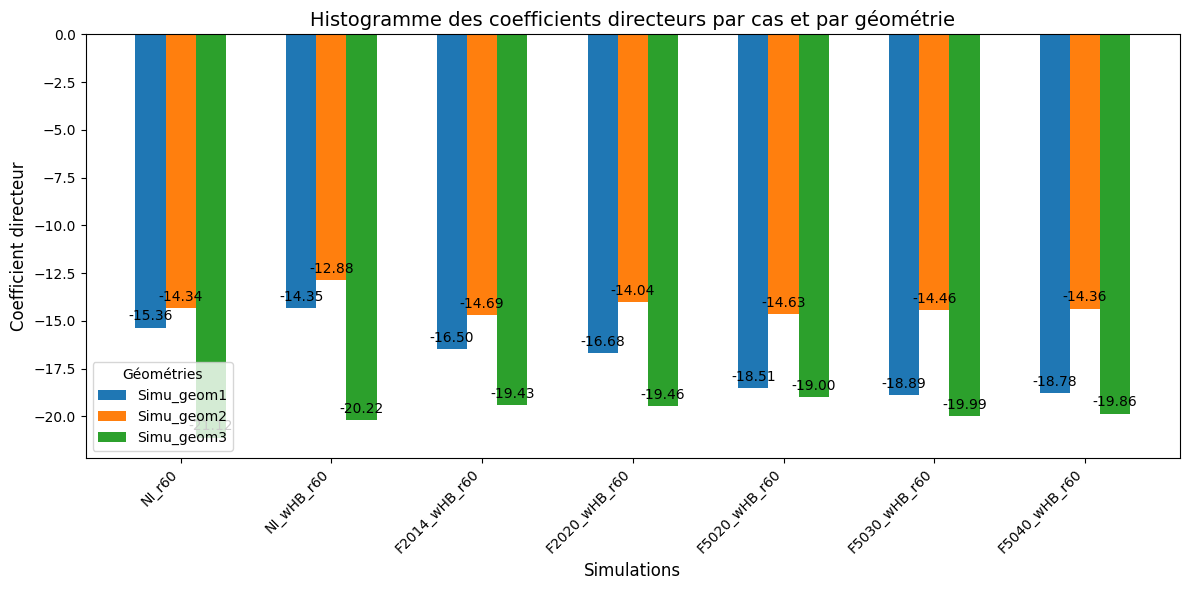

In [146]:
# Configuration pour les barres
num_geoms = len(coeff_geom_mean_list)  # Nombre de géométries (Simu_geom1, Simu_geom2, etc.)
num_cases = len(names)  # Nombre de cas par géométrie (7 cas)
width = 0.2  # Largeur des barres

# Création de la figure
fig, ax = plt.subplots(figsize=(12, 6))

# Positions des barres sur l'axe des x
x = np.arange(num_cases)  # Création d'un tableau pour l'axe des x

# Ajout des barres pour chaque simulation (chaque géométrie)
for i in range(num_geoms):
    ax.bar(x + i * width, coeff_geom_mean_list[i], width, label=f'Simu_geom{i+1}')

# Ajout des valeurs sous chaque barre
for i in range(num_geoms):
    for j in range(num_cases):
        height = coeff_geom_mean_list[i][j]
        ax.annotate(f'{height:.2f}', 
                    xy=(x[j] + i * width, height), 
                    xytext=(0, 3),  # Décalage vers le haut
                    textcoords="offset points",
                    ha='center', va='bottom')

# Paramètres de l'axe des x
ax.set_xlabel('Simulations', fontsize=12)
ax.set_ylabel('Coefficient directeur', fontsize=12)
ax.set_title('Histogramme des coefficients directeurs par cas et par géométrie', fontsize=14)
ax.set_xticks(x + width)  # Alignement des labels au centre du groupe de barres
ax.set_xticklabels(names, rotation=45, ha='right')

# Ajout de la légende pour différencier les géométries
ax.legend(title="Géométries")

# Affichage de l'histogramme
plt.tight_layout()
plt.show()

In [2]:
## Récupérer les valeurs de Qdot pour chaque cas et chaque géométrie

plot_hyp['method'] = 'case'
plot_hyp['nb_mesh'] = 1
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
plot_hyp['folder_path'] = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests\Simu_geom1'

folders_names = ['cas_V4.5NI_simplified_Vref_M1',
                 'cas_V4.5NI_simplified_wHB_Vref_M1',
                 'cas_V4.5F2014_simplified_wHB_Vref_M1',
                 'cas_V4.5F2020_simplified_wHB_Vref_M1',
                 'cas_V4.5F5020_simplified_wHB_Vref_M1',
                 'cas_V4.5F5030_simplified_wHB_Vref_M1',
                 'cas_V4.5F5040_simplified_wHB_Vref_M1']

names = ['NI_r60',
         'NI_wHB_r60',
         'F2014_wHB_r60',
         'F2020_wHB_r60',
         'F5020_wHB_r60',
         'F5030_wHB_r60',
         'F5040_wHB_r60']

nb_it = [[[3,2,2],
          [2,2,2],
          [3,2,2],
          [2,2,2],
          [3,2,2],
          [2,2,2],
          [2,2,2]],

        [[2,3,2],
         [3,4,3],
         [2,2,2],
         [4,2,2],
         [2,2,2],
         [2,2,2],
         [2,2,2]],

        [[4,4,4],
         [5,3,3],
         [4,4,3],
         [4,3,3],
         [3,3,3],
         [2,2,2],
         [2,2,2]]]

T_amb = 273.15
Ag = 1.95

# Initialize lists for plotting
bar_width = 0.15
index = np.arange(len(names))
bar_colors = ['b', 'g', 'r', 'c', 'm']

Qdot_top_conv_geom_mesh_case_list = []
Qdot_top_rad_geom_mesh_case_list = []
Qdot_PV_sky_geom_mesh_case_list = []
Qdot_tube_back_conv_geom_mesh_case_list = []
Qdot_tube_back_rad_geom_mesh_case_list = []

for i in range(1, 4):
    plot_hyp['folder_path'] = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests\Simu_geom'+str(i)
    Qdot_top_conv_mesh_case_list = []
    Qdot_top_rad_mesh_case_list = []
    Qdot_PV_sky_mesh_case_list = []
    Qdot_tube_back_conv_mesh_case_list = []
    Qdot_tube_back_rad_mesh_case_list = []
    
    for case in range(3):        
        Qdot_top_conv_case_list = []
        Qdot_top_rad_case_list = []
        Qdot_PV_sky_case_list = []
        Qdot_tube_back_conv_case_list = []
        Qdot_tube_back_rad_case_list = []
        
        for geom in range(len(folders_names)):

        
            plot_hyp['folder_mesh'] = folders_names[geom]
            plot_hyp['nb_it'] = nb_it[i-1][geom][case]
            no_it = plot_hyp['nb_it']-1
            plot_hyp['no_case'] = case
            no_case = plot_hyp['no_case']

            ht_tot_mesh_case_list, ht_rad_mesh_case_list, ht_conv_mesh_case_list, CFD_mesh_case_list, df_one_mesh_case_list, slices_df_mesh_case_list, PyFluent_mesh_case_list = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)

            ratio_rad, ratio_conv = pb.rad_conv_ratio(plot_hyp, panelSpecs, hyp, stepConditions, no_case, no_it)

            Qdot_top_conv = ratio_conv*df_one_mesh_case_list[no_it]['Qdot_top_conv'].sum()
            Qdot_top_rad = ratio_rad*df_one_mesh_case_list[no_it]['Qdot_top_conv'].sum()
            Qdot_PV_sky = df_one_mesh_case_list[no_it]['Qdot_PV_sky'].sum() 
            Qdot_tube_back_conv = ratio_conv*df_one_mesh_case_list[no_it]['Qdot_tube_back'].sum() 
            Qdot_tube_back_rad = ratio_rad*df_one_mesh_case_list[no_it]['Qdot_tube_back'].sum() 

            Qdot_top_conv_case_list.append(Qdot_top_conv)
            Qdot_top_rad_case_list.append(Qdot_top_rad)
            Qdot_PV_sky_case_list.append(Qdot_PV_sky)
            Qdot_tube_back_conv_case_list.append(Qdot_tube_back_conv)
            Qdot_tube_back_rad_case_list.append(Qdot_tube_back_rad)
        
        Qdot_top_conv_mesh_case_list.append(Qdot_top_conv_case_list)
        Qdot_top_rad_mesh_case_list.append(Qdot_top_rad_case_list)
        Qdot_PV_sky_mesh_case_list.append(Qdot_PV_sky_case_list)
        Qdot_tube_back_conv_mesh_case_list.append(Qdot_tube_back_conv_case_list)
        Qdot_tube_back_rad_mesh_case_list.append(Qdot_tube_back_rad_case_list)

    Qdot_top_conv_geom_mesh_case_list.append(Qdot_top_conv_mesh_case_list)
    Qdot_top_rad_geom_mesh_case_list.append(Qdot_top_rad_mesh_case_list)
    Qdot_PV_sky_geom_mesh_case_list.append(Qdot_PV_sky_mesh_case_list)
    Qdot_tube_back_conv_geom_mesh_case_list.append(Qdot_tube_back_conv_mesh_case_list)
    Qdot_tube_back_rad_geom_mesh_case_list.append(Qdot_tube_back_rad_mesh_case_list)


In [3]:
## Plotting the values of Qdot for each case and each geometry

for case in range(3):
    print(f'Case {case}')
    for i in range(0, 3):
        Qdot_values = {
            'Qdot_top_conv': Qdot_top_conv_geom_mesh_case_list[i][case],
            'Qdot_top_rad': Qdot_top_rad_geom_mesh_case_list[i][case],
            'Qdot_PV_sky': Qdot_PV_sky_geom_mesh_case_list[i][case],
            'Qdot_tube_back_conv': Qdot_tube_back_conv_geom_mesh_case_list[i][case],
            'Qdot_tube_back_rad': Qdot_tube_back_rad_geom_mesh_case_list[i][case]
        }
        
        bar_colors = ['blue', 'orange', 'green', 'red', 'purple']
        bar_width = 0.2  # Largeur des barres
        num_bars = len(Qdot_values)
        
        fig = go.Figure()
        
        for idx, (key, values) in enumerate(Qdot_values.items()):
            bar_positions = [x + (idx - (num_bars - 1) / 2) * bar_width for x in range(len(values))]
            
            fig.add_trace(go.Bar(
                x=bar_positions,
                y=values,
                name=key,
                marker_color=bar_colors[idx % len(bar_colors)],
                width=bar_width
            ))
        
        fig.update_layout(
            title='Case ' + str(case) + ' - Geom ' + str(i+1),
            xaxis_title='Geometries',
            yaxis_title='Qdot (W/m²)',
            xaxis=dict(
                tickvals=list(range(len(Qdot_values))),
                ticktext=names,  # Assure-toi que 'names' est défini ailleurs dans ton code
                tickangle=45
            ),
            barmode='group'
        )
        
        fig.show()


Case 0


Case 1


Case 2
